# Visualization of Kalman Filter performance

In [65]:
from test_fastSimulation import *
import scipy;
import matplotlib.pyplot as plt;
from bokeh.io import output_notebook
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import *
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.CDSCompress import *
import forestci as fci
from bokeh.io import curdoc
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [66]:
df=loadData("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.list")

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root


## Make BDT Forest Regression

In [67]:
varIn=["fPdgCodeMC","paramFullMC2","paramFullMC3","paramFullMC4","NPointsFullRefit"]
target="pullFullRefit4"
n_estimators=200
n_jobs=10
nPoints=500000
max_depthBase=14
max_samples=0.05

regressor = RandomForestRegressor(n_estimators =n_estimators,n_jobs=n_jobs,max_depth=max_depthBase,max_samples=max_samples)
#dfFit=df.query("(statusMaskFullRefit&0x2000)>0")
dfFit0=df[((df["statusMaskFullRefit"]&0x1000)>0)].query(f"abs({target})<10")
dfFit1=dfFit0.sample(frac=0.05).sort_index()
#
#
nAll=dfFit1.shape[0]
X_train = dfFit1[varIn].iloc[:nAll//2]
X_test = dfFit1[varIn].iloc[nAll//2:]
Y_train = dfFit1[target].iloc[:nAll//2]
Y_test = dfFit1[target].iloc[nAll//2:]

forest = regressor.fit(X_train, Y_train)


dfFit1[f"{target}Pred0"]=regressor.predict(dfFit1[varIn])
Y_hat_train = dfFit1[f"{target}Pred0"].iloc[:nAll//2]
Y_hat_test = dfFit1[f"{target}Pred0"].iloc[nAll//2:]

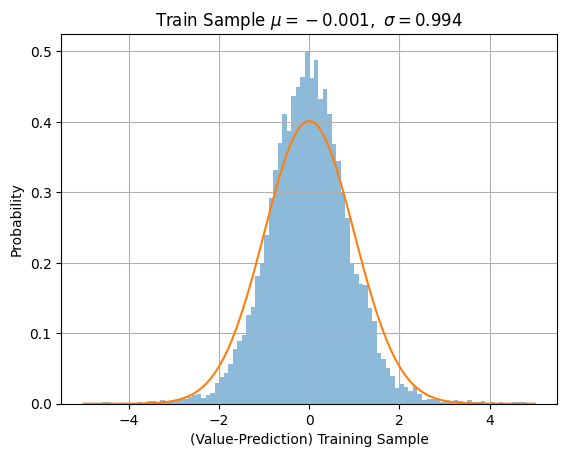

mean = -0.0009353046359348868   sigma = 0.9936128343988467


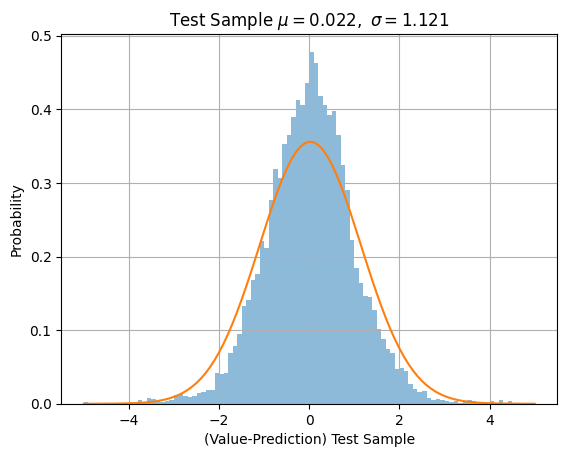

mean = 0.022291411361805537   sigma = 1.120699534346426


In [69]:
train_diff = Y_hat_train-Y_train
test_diff = Y_hat_test-Y_test

#Plot and fit differences in 
_, bins, _ = plt.hist(train_diff.values, 100, density=1,alpha=0.5,range=[-5, 5])
mu, sigma = scipy.stats.norm.fit(train_diff.values)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel('(Value-Prediction) Training Sample')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Train \ Sample}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()
print("mean =",str(mu),"  sigma =",str(sigma))

#Plot 
_, bins, _ = plt.hist(test_diff.values, 100, density=1,alpha=0.5,range=[-5, 5])
mu, sigma = scipy.stats.norm.fit(test_diff.values)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel('(Value-Prediction) Test Sample')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Test \ Sample}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()
print("mean =",str(mu),"  sigma =",str(sigma))

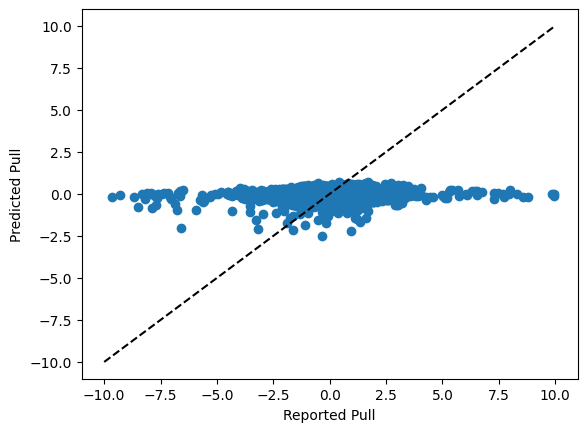

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask


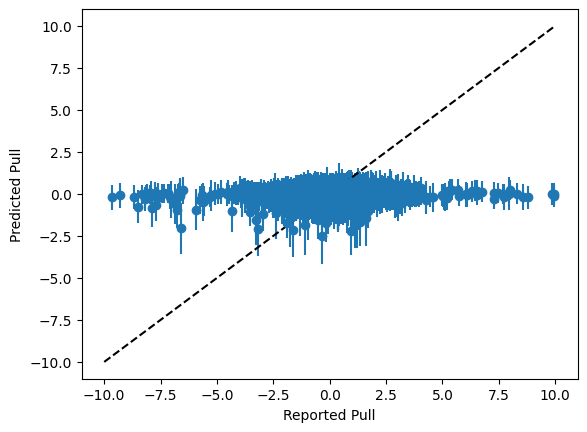

In [ ]:
# Test Sample
# Plot predicted pulls without error bars

plt.scatter(Y_test, Y_hat_test)
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

# Calculate the variance:
mpg_V_IJ_unbiased = fci.random_forest_error(forest, X_train.values,
                                            X_test.values)

# Plot error bars for predicted pulls using unbiased variance
plt.errorbar(Y_test, Y_hat_test, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

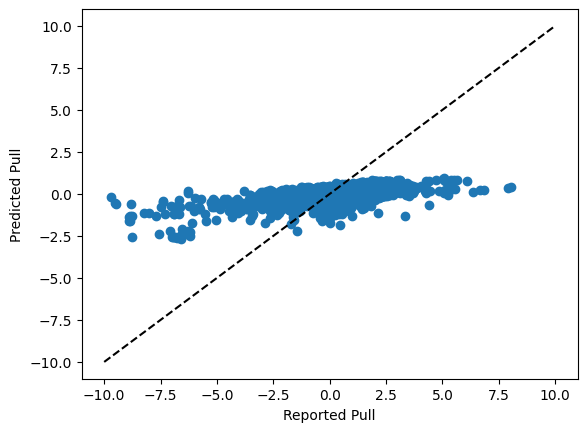

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask


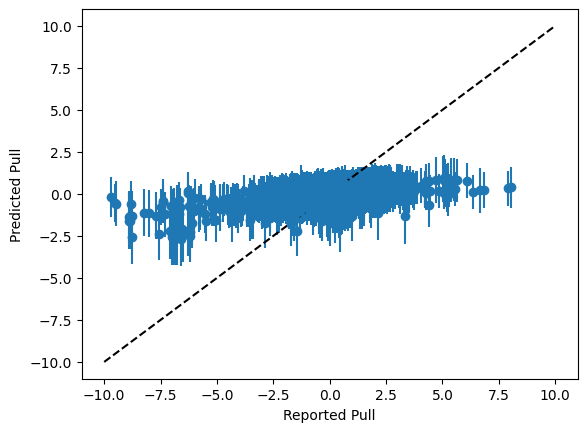

In [ ]:
#Train sample
# Plot predicted pulls without error bars
plt.scatter(Y_train, Y_hat_train)
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

# Calculate the variance:
mpg_V_IJ_unbiased = fci.random_forest_error(forest, X_train.values,
                                            X_train.values)

# Plot error bars for predicted Pulls using unbiased variance
plt.errorbar(Y_train, Y_hat_train, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

## Create pull Interactive HTML

In [ ]:
histoArray = [
    {"name": "histoRes0", "variables": ["pullFullRefit0"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes1", "variables": ["pullFullRefit1"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes2", "variables": ["pullFullRefit2"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes3", "variables": ["pullFullRefit3"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes4", "variables": ["pullFullRefit4"], "nbins": 100, "range": [-6, 6]}
    ]

figureArray = [
    [['pullFullRefit0'], ["histoRes0"],{}],
    [['pullFullRefit1'], ["histoRes1"],{}],
    [['pullFullRefit2'], ["histoRes2"],{}],
    [['pullFullRefit3'], ["histoRes3"],{}],
    [['pullFullRefit4'], ["histoRes4"],{}],
    ["tableHisto", {"rowwise": False}],
    ['table'],
    {"size": 1}   
    ]

widgetParams = [
    ['range', ['paramFullMC2']],
    ['range', ['paramFullMC3']],
    ['range', ['paramFullMC4']],
    ['range', ['NPointsFullRefit']],
    ['select', ['fPdgCodeMC']],
    ['select', ['statusMaskFullRefit']]
    
]

widgetLayoutDesc=[ [0,1],[2,3],[4,5], {'sizing_mode':'scale_width'} ]
figureLayoutDesc=[
    [0,1,2,3,4, {'plot_height':800}],
    {'plot_height':1000,'sizing_mode':'scale_width'}
]
tooltips = [("ptMC","@ptMC")]
output_file("fastMCKalmanResiduals.html")

figC=bokehDrawSA.fromArray(df,"abs(fPdgCodeMC)<100000", figureArray, widgetParams,
                           layout=figureLayoutDesc,sizing_mode='scale_width',
                           widgetLayout=widgetLayoutDesc,nPointRender=5000,
                           rescaleColorMapper=True,histogramArray=histoArray)

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/RootInteractive/RootInteractive/InteractiveDrawing/bokeh/bokehTools.py:1408: FutureWarning: Specifying `na_sentinel=None` is deprecated, specify `use_na_sentinel=False` instead.
  codes, optionsPlot = pd.factorize(dfCategorical, sort=True, na_sentinel=None)


11
4
